In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from ising_kitaev import initialize_chain, run_adiabatic_zeeman_change, rotate_to_measurement_basis, add_measurement
from ising_kitaev import move_chain

In [2]:
zeeman_ferro = 0.01  # value of on-site magnetic field for ferromagnetic domain
zeeman_para = 10  # value of on-site magnetic field for paramagnetic domain
initial_config = np.array([zeeman_ferro, zeeman_ferro, zeeman_ferro, zeeman_para, zeeman_para, zeeman_para])
final_config = np.array([zeeman_para, zeeman_para, zeeman_para, zeeman_ferro, zeeman_ferro, zeeman_ferro])
qreg = QuantumRegister(6)
creg = ClassicalRegister(3)
qcirc = QuantumCircuit(qreg, creg)

from qiskit import Aer, execute

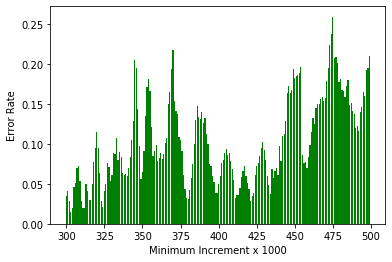

In [3]:
dict = {}
for i in range(300, 500):
    qcirc = QuantumCircuit(qreg, creg)
    initialize_chain(qcirc, qreg, initial_config, 'logical_zero')
    # moving ferromagenetic domain to one end
    move_chain(qcirc, qreg, initial_config, final_config, 0, 0.25,0.001 * i, 2, 10, method = "both")
    # moving back the ferromagnetic domain
    rotate_to_measurement_basis(qcirc, qreg, [3, 4, 5]) # measurement in logical basis
    add_measurement(qcirc, qreg, creg, [3, 4, 5])
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qcirc, backend, shots=2000)
    result = job.result()
    result.get_counts()
    r = round(1 - result.get_counts().get('000', "")/2000, 4)
    dict[i] = r 

plt.xlabel('Minimum Increment x 1000', fontsize= 10)
plt.ylabel('Error Rate', fontsize= 10)
plt.bar(list(dict.keys()),dict.values(), color = 'g')
plt.show()

Error rate is plotted on the Y-axis and the minimum increment value * 1000 is plotted on the X-axis. It appears that an ideal zone where the error rate is less than 0.05 occurs at between 0.425 and 0.450.  This value can be characterized further with more specific increments. 